In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x, y = dataset.data, dataset.target
x.shape, y.shape

((569, 30), (569,))

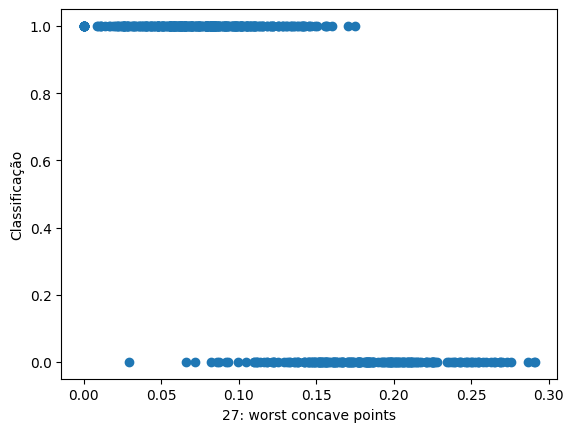

In [ ]:
import matplotlib.pyplot as plt
i=27
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel("Classificação")
plt.scatter(x[:, i], y)
plt.show()

In [ ]:
x27 = x[:, 27:28]

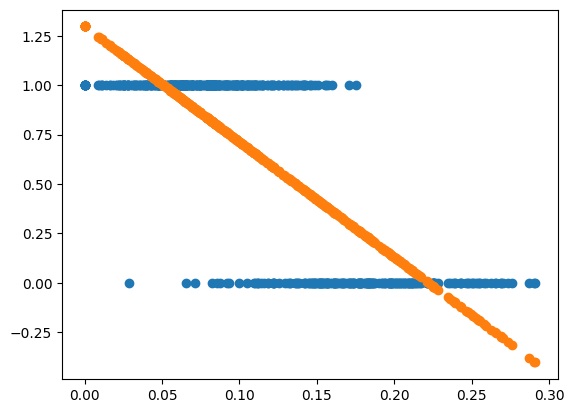

(0.08655219828445855, 0.0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(x27, y)
ypred = modelo.predict(x27)
plt.scatter(x27, y)
plt.scatter(x27, ypred)
plt.show()
mean_squared_error(y, ypred), sum(y==ypred)/len(y)

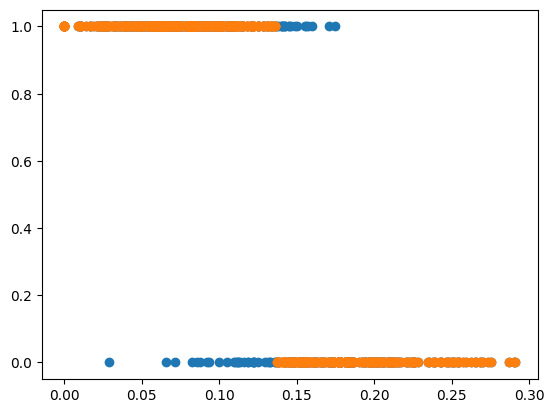

(0.08787346221441125, 0.9121265377855887)

In [ ]:
# percebemos que ao tentar realizar uma regressão linear houve um total de 0 acertos
# isso se dá pelo fato de que esse não é um problema de regressão linear, mas sim de classificação
# podemos tentar simular uma classificação ajustando o nosso método

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(x27, y)
ypred = modelo.predict(x27)>0.5 # aqui transformamos os dados em 0 ou 1
plt.scatter(x27, y)
plt.scatter(x27, ypred)
plt.show()
mean_squared_error(y, ypred), sum(y==ypred)/len(y)

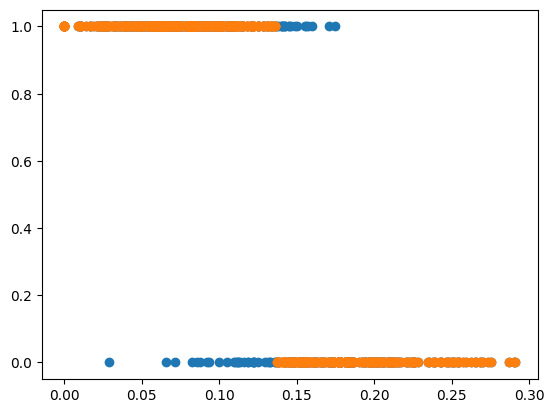

(0.08787346221441125, 0.9121265377855887)

In [ ]:
# criando um "classificador linear"

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class ClassificadorLinear(BaseEstimator, ClassifierMixin):
  def __init__(self):
    self.lrmodel = LinearRegression()
    self.treshold = 0.5
  def fit(self, x, y):
    self.lrmodel.fit(x,y)
  def predict(self, x, y=None):
   ypred =  self.lrmodel.predict(x)
   ypred = (ypred>self.treshold).astype(int)
   return ypred


modelo = ClassificadorLinear()
modelo.fit(x27, y)
ypred = modelo.predict(x27)
plt.scatter(x27, y)
plt.scatter(x27, ypred)
plt.show()
mean_squared_error(y, ypred), accuracy_score(y, ypred)

In [ ]:
1 - accuracy_score(y, ypred)
# este calculo resulta no mean squared error

0.08787346221441128

In [ ]:
ypred[0] = 1
accuracy_score(y, ypred)
# a acuracia é muito sensivel a erros, alterando um parametro de centenas já a afetamos consideravelmente

0.9103690685413005

In [ ]:
modelo = ClassificadorLinear()
modelo.fit(x, y)
ypred = modelo.predict(x)
accuracy_score(y, ypred)

0.9648506151142355

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(solver="liblinear") # o algoritmo padrão é o lbfgs, porém ele não suportou o tamanho do dataset
modelo.fit(x, y)
ypred = modelo.predict(x)
accuracy_score(y, ypred)

0.9595782073813708

In [ ]:
from sklearn.linear_model import SGDClassifier # descida de gradiente estocástica

modelo = SGDClassifier()
modelo.fit(x, y)
ypred = modelo.predict(x)
accuracy_score(y, ypred)

0.9156414762741653

In [ ]:
from sklearn.linear_model import Perceptron

modelo = Perceptron()
modelo.fit(x, y)
ypred = modelo.predict(x)
accuracy_score(y, ypred)

0.9261862917398945

In [ ]:
modelo.coef_  # o resultado de todo modelo é um vetor de coeficientes representando por coef_

array([[ 2.30434100e+03,  2.97808000e+03,  1.32373800e+04,
         4.55750000e+03,  1.99728200e+01, -1.39147700e+01,
        -4.75552493e+01, -1.99746190e+01,  3.85718000e+01,
         1.62372600e+01,  6.11430000e+00,  2.13245700e+02,
        -1.26940700e+02, -6.19829200e+03,  9.33463000e-01,
        -3.70119900e+00, -6.05731830e+00, -8.79828000e-01,
         3.13196800e+00,  1.54238900e-01,  2.42195700e+03,
         3.69363000e+03,  1.31086400e+04, -6.70030000e+03,
         2.39875500e+01, -5.68726600e+01, -1.05821866e+02,
        -2.51252590e+01,  4.93057000e+01,  1.36139600e+01]])

In [ ]:
modelo.intercept_ # o bias de cada modelo é representado pelo intercept_

array([301.])

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class ClassificadorAleatorio(BaseEstimator, ClassifierMixin):
  def fit(self, x, y):
    pass
  def predict(self, x, y=None):
   ypred =  (np.random.uniform(low=0, high=1, size=(x.shape[0],))>0.5).astype(int)
   return ypred

modelo = ClassificadorAleatorio()
ypred = modelo.predict(x)
accuracy_score(y, ypred)

0.4956063268892794

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from collections import Counter

def maisFrequente(y):
  return Counter(y.flat).most_common(1)[0][0]

class ClassificadorZeroR(BaseEstimator, ClassifierMixin):
  def fit(self, x, y):
    self.resposta = maisFrequente(y)
  def predict(self, x, y=None):
   ypred = np.empty((x.shape[0]))
   ypred[:] = self.resposta
   return ypred

modelo = ClassificadorZeroR()
modelo.fit(x, y)
ypred = modelo.predict(x)
accuracy_score(y, ypred)

0.6274165202108963

In [ ]:
sum(y)/len(y) # este cálculo resulta no mesmo valor de acurácia do Zero R

0.6274165202108963

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(x, y)
ypred = modelo.predict(x)
accuracy_score(y, ypred) # o resultado de acurácia perfeita pode se dar ao fato de estarmos treinando e testando com a mesma base de dados

1.0

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.4, random_state=42) # random_state define qual seed será usada para dividir o conjunto de dados em treino/teste
 # sem o random_state será feita uma divisão diferente toda vez que o modelo for executado

modelo.fit(xtr, ytr)
ypred = modelo.predict(xte)
accuracy_score(yte, ypred)



0.9429824561403509